# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
#import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### **TASK 2: DATA CLEANING**

Issues
 - Some reviews contain unneccessary additions like "✅ Trip Verified" which should be removed.
 - Check for prescence of missing data and remove
 - Prescence of Stopwords
 - Prescence of  names and making the text lower case

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3598 non-null   object
dtypes: object(1)
memory usage: 28.2+ KB


In [ ]:
df.head(15)

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...
5,✅ Trip Verified | We arrived at Heathrow at 0...
6,✅ Trip Verified | Original flight was cancell...
7,Not Verified | Airport check in was functiona...
8,✅ Trip Verified | Flight fine. In-line with c...
9,✅ Trip Verified | Came from Glasgow to London...


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.tail(1500)

,reviews
2098,✅ Verified Review | First class flight from Lo...
2099,✅ Verified Review | \r\nFlying in Club Europe...
2100,✅ Verified Review | British Airways flight fr...
2101,Flew economy class from Manchester to Johannes...
2102,Club Europe flights from London Gatwick to Sev...
...,...
3593,Flew LHR - VIE return operated by bmi but BA a...
3594,LHR to HAM. Purser addresses all club passenge...
3595,My son who had worked for British Airways urge...
3596,London City-New York JFK via Shannon on A318 b...


In [ ]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '')
df['reviews'] = df['reviews'].str.replace('Not Verified', '')
df['reviews'] = df['reviews'].str.replace('✅ Verified Review', '')
df['reviews'] = df['reviews'].str.replace('|', '')


<ipython-input-68-1c8e0de1b77a>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace('|', '')


In [ ]:
df.head()

,reviews
0,My family and I have flown mostly on Britis...
1,This has been by far the worst service I ha...
2,In Nov 2022 I booked and paid for a return ...
3,BA is not treating its premium economy passe...
4,24 hours before our departure on BA059 to C...


In [ ]:
df.tail(1500)

,reviews
2098,First class flight from London Gatwick to St...
2099,\r\nFlying in Club Europe from London City ...
2100,British Airways flight from Baltimore to He...
2101,Flew economy class from Manchester to Johannes...
2102,Club Europe flights from London Gatwick to Sev...
...,...
3593,Flew LHR - VIE return operated by bmi but BA a...
3594,LHR to HAM. Purser addresses all club passenge...
3595,My son who had worked for British Airways urge...
3596,London City-New York JFK via Shannon on A318 b...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download([
    "names",
    "stopwords",
   "averaged_perceptron_tagger",
    "vader_lexicon",
 "punkt",
 ])
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()
%matplotlib inline

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# set stopword

nltk.download('names')
wn = nltk.download('wordnet')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# function to clean text

def clean_text(data, stopword):

    # casefolding
    data = [i.lower() for i in data]
    data = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|\d+", " ", i).split()) for i in data]
    res = ' '.join(data)

    # tokenizing
    word_tokens = word_tokenize(res)
    res = ' '.join([i for i in word_tokens if not i in stopword])

    return res

In [ ]:
review_filtered = []
for i in df['reviews']:
    review_filtered.append(clean_text([i], stop_words))

In [ ]:
df['reviews_cleaned'] = review_filtered

In [ ]:
df.head()

,reviews,reviews_cleaned
0,My family and I have flown mostly on Britis...,family flown mostly british airways last years...
1,This has been by far the worst service I ha...,far worst service plane obvious flying economy...
2,In Nov 2022 I booked and paid for a return ...,nov booked paid return journey new zealand ret...
3,BA is not treating its premium economy passe...,ba treating premium economy passengers respect...
4,24 hours before our departure on BA059 to C...,hours departure ba cape town heathrow thursday...


In [ ]:
def pos_tagger(nltk_tag):
  """allowing some figures of speech"""
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None


def lemma_nlk(sentence):
  """function to lemmatize"""
  pos_tagged = nltk.pos_tag(sentence)
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      # if there is no available tag, append the token as is
      lemmatized_sentence.append(word)
    else:
      # else use the tag to lemmatize the token
      lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
  lemmatized_sentence = " ".join(lemmatized_sentence)
  return lemmatized_sentence

In [ ]:
nltk.download('omw-1.4')
comment_lemma = []
for i in df['reviews_cleaned']:
  comment_lemma.append(lemma_nlk(i.split(' ')))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df['reviews_lemmatized'] = comment_lemma

In [ ]:
df.head()

,reviews,reviews_cleaned,reviews_lemmatized
0,My family and I have flown mostly on Britis...,family flown mostly british airways last years...,family fly mostly british airway last year pri...
1,This has been by far the worst service I ha...,far worst service plane obvious flying economy...,far bad service plane obvious fly economy freq...
2,In Nov 2022 I booked and paid for a return ...,nov booked paid return journey new zealand ret...,nov book pay return journey new zealand return...
3,BA is not treating its premium economy passe...,ba treating premium economy passengers respect...,ba treat premium economy passenger respect pay...
4,24 hours before our departure on BA059 to C...,hours departure ba cape town heathrow thursday...,hour departure ba cape town heathrow thursday ...


### SENTIMENT **ANALYSIS**

The sentiment using VADER ( Valence Aware Dictionary for Sentiment Reasoning). It is basically a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [ ]:
def sentiment(comp):
    if comp >= 0.05:
        return 'positive'
    elif (comp > -0.05) and (comp < 0.05):
        return 'neutral'
    elif comp <= -0.05 :
        return 'negative'

In [ ]:
# initialize sentiment analyzer

analyzer = SentimentIntensityAnalyzer()
# calculate compound score

compound_score = []
for i in df['reviews_lemmatized']:
    compound_score.append(analyzer.polarity_scores(i)['compound'])

In [ ]:
df['compound_score'] = compound_score

In [ ]:
sentiment(df['compound_score'].values[1])

'positive'

In [ ]:
sent = []
for i in range(0, len(df)):
  sent.append(sentiment(df['compound_score'].values[i]))

In [ ]:
df['sentiment'] = sent

In [ ]:
df['sentiment'].value_counts()

positive    2438
negative    1105
neutral       55
Name: sentiment, dtype: int64

In [ ]:
df_neg = df[df['sentiment']=='negative']
df_pos = df[df['sentiment']=='positive']
df_neu = df[df['sentiment']=='neutral']

In [ ]:
df.head()

,reviews,reviews_cleaned,reviews_lemmatized,compound_score,sentiment
0,My family and I have flown mostly on Britis...,family flown mostly british airways last years...,family fly mostly british airway last year pri...,0.9475,positive
1,This has been by far the worst service I ha...,far worst service plane obvious flying economy...,far bad service plane obvious fly economy freq...,0.2500,positive
2,In Nov 2022 I booked and paid for a return ...,nov booked paid return journey new zealand ret...,nov book pay return journey new zealand return...,-0.5801,negative
3,BA is not treating its premium economy passe...,ba treating premium economy passengers respect...,ba treat premium economy passenger respect pay...,0.6597,positive
4,24 hours before our departure on BA059 to C...,hours departure ba cape town heathrow thursday...,hour departure ba cape town heathrow thursday ...,-0.7713,negative


### **EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

Analysis of General Sentiments

<Axes: xlabel='sentiment', ylabel='count'>

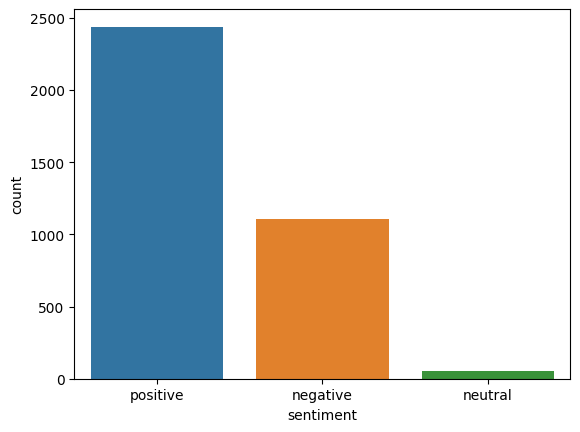

In [ ]:
sns.countplot(x='sentiment',data =df)

Common Words in Reviews


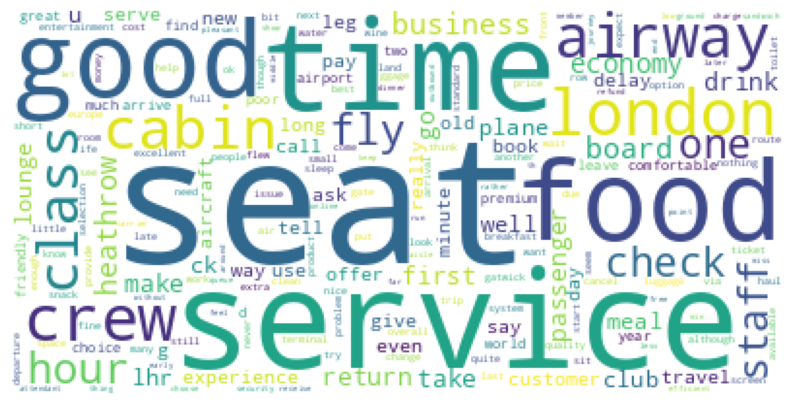

In [ ]:
from wordcloud import WordCloud
review_words = ','.join(list(df['reviews_lemmatized'].values))
review_words = review_words.replace("flight", "")
review_words = review_words.replace("ba", "")
review_words = review_words.replace("british", "")
review_words = review_words.replace("airline", "")
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(review_words)

# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Common Words in Positive Reviews

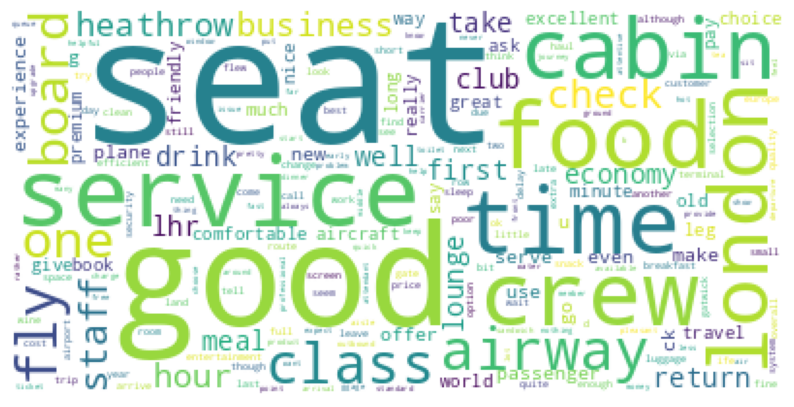

In [ ]:
from wordcloud import WordCloud
review_words = ','.join(list(df_pos['reviews_lemmatized'].values))
review_words = review_words.replace("flight", "")
review_words = review_words.replace("ba", "")
review_words = review_words.replace("british", "")
review_words = review_words.replace("airline", "")
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(review_words)

# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Common Words In Negative Reviews

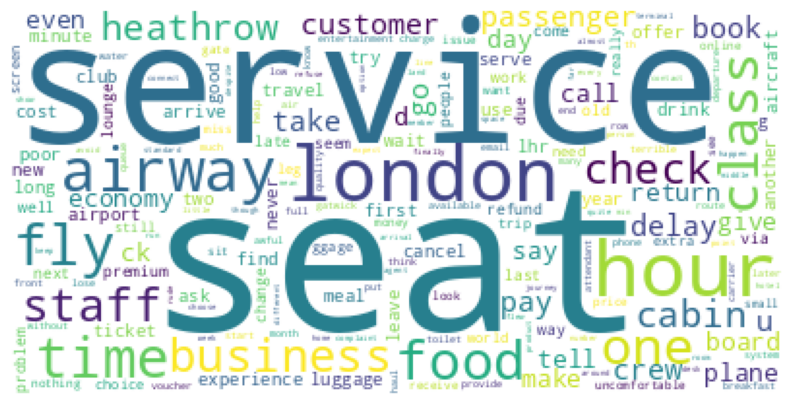

In [ ]:
from wordcloud import WordCloud
review_words = ','.join(list(df_neg['reviews_lemmatized'].values))
review_words = review_words.replace("flight", "")
review_words = review_words.replace("ba", "")
review_words = review_words.replace("british", "")
review_words = review_words.replace("airline", "")
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(review_words)

# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Common words in Neutral Review


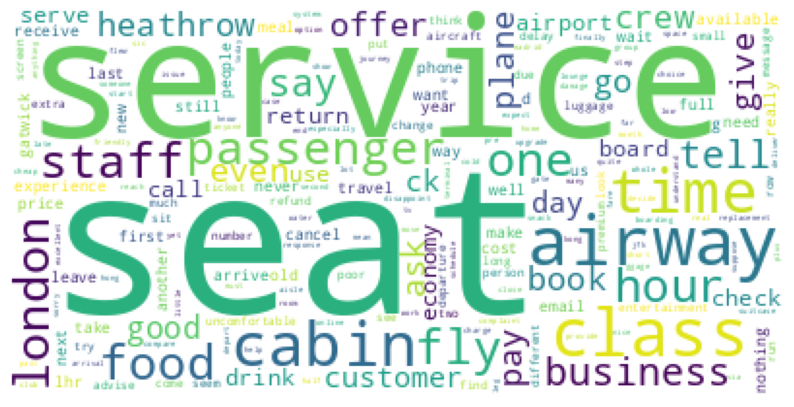

In [ ]:
from wordcloud import WordCloud
review_words = ','.join(list(df_neu['reviews_lemmatized'].values))
review_words = review_words.replace("flight", "")
review_words = review_words.replace("ba", "")
review_words = review_words.replace("british", "")
review_words = review_words.replace("airline", "")
wordcloud = WordCloud(background_color="white",
                      max_words= 200,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(review_words)

# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Common Words in the Reviews

In [ ]:
from collections import Counter

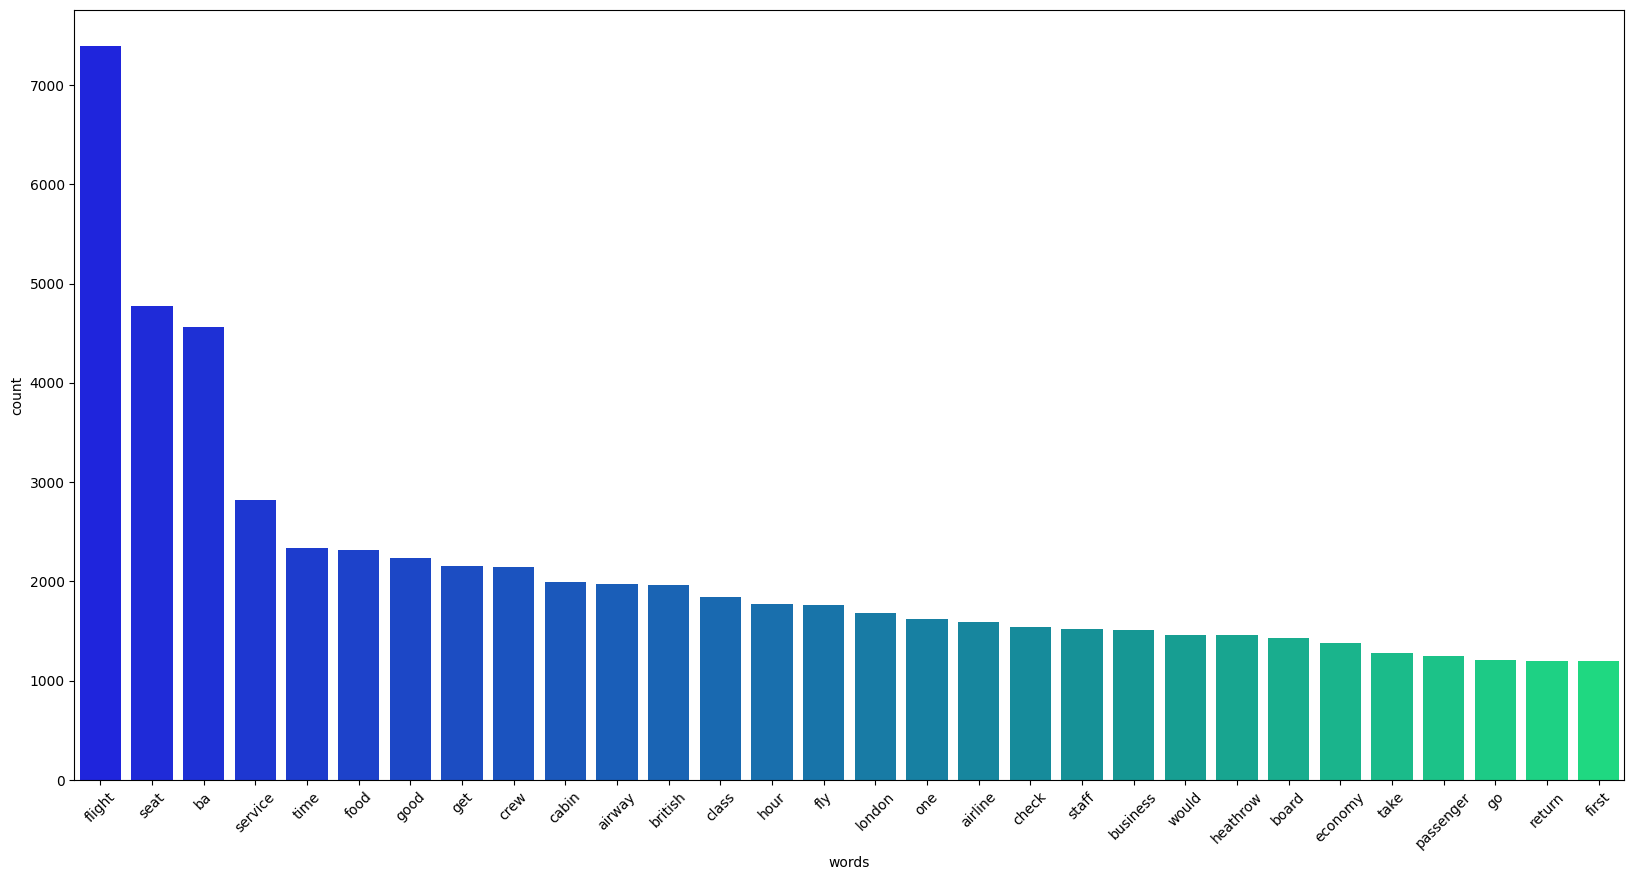

In [ ]:
review_words = ','.join(list(df['reviews_lemmatized'].values))
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);